# SVM

In [1]:
import pandas as pd

#from google.colab import drive
#drive.mount('/content/drive')

#df= pd.read_csv("/content/drive/MyDrive/preprocessed_file_v1_filtered", sep="\t")
df= pd.read_csv("preprocessed_file_v2_filtered", sep="\t")

C:\Users\Sami\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1350,1351,1352,1353) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
features= df.drop(['SAMPLE_ID'], axis = 1)
features.head()

,NRAS,ATM,KRAS,AKT1,TP53,ERBB2,CTNNB1,PIK3CA,KIT,APC,...,KIF5B,PTTG1,CANCER_TYPE,SEX,PRIMARY_RACE,ETHNICITY,YEAR_CONTACT,DEAD,YEAR_DEATH,AGE_AT_SEQ_REPORT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,Glioma,Male,White,Non-Spanish/non-Hispanic,Unknown,Unknown,Unknown,<18
1,0,0,0,0,0,0,0,0,0,0,...,0,0,Leukemia,Female,White,Non-Spanish/non-Hispanic,Unknown,TRUE,2018,<18
2,0,0,0,0,0,0,0,0,0,0,...,0,0,Leukemia,Female,White,Non-Spanish/non-Hispanic,Unknown,TRUE,2018,<18
3,0,0,0,0,0,0,0,0,0,0,...,0,0,Leukemia,Female,White,Non-Spanish/non-Hispanic,Unknown,TRUE,2018,<18
4,0,0,0,0,0,0,0,0,0,0,...,0,0,Glioma,Male,White,Non-Spanish/non-Hispanic,Unknown,Unknown,Unknown,<18


In [3]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
df.CANCER_TYPE = pd.Categorical(df.CANCER_TYPE)
df.CANCER_TYPE = df.CANCER_TYPE.cat.codes
labels = np.array(df['CANCER_TYPE'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('CANCER_TYPE', axis = 1)

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)


# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [4]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (73188, 1657)
Training Labels Shape: (73188,)
Testing Features Shape: (24396, 1657)
Testing Labels Shape: (24396,)


In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1, verbose=2)
classifier.fit(train_features, train_labels)

[LibSVM]

SVC(random_state=1, verbose=2)

In [7]:
predictions = classifier.predict(test_features)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predictions))

Accuracy: 0.6260862436464995


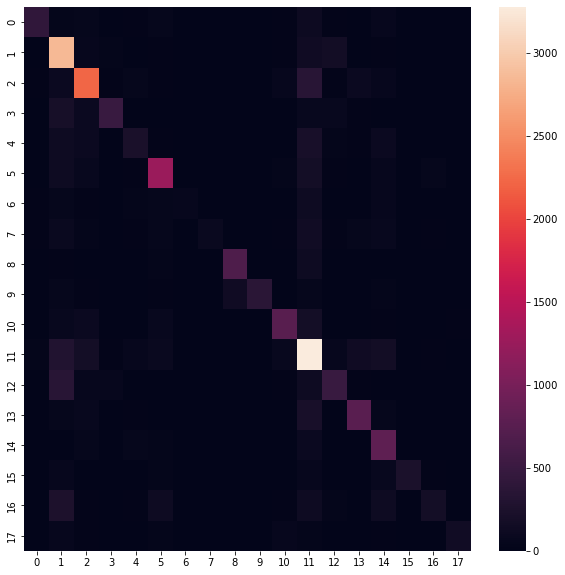

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(test_labels, predictions)


# Visualize it as a heatmap
import seaborn
plt.figure(figsize=(10,10))
seaborn.heatmap(conf_mat)
plt.show()

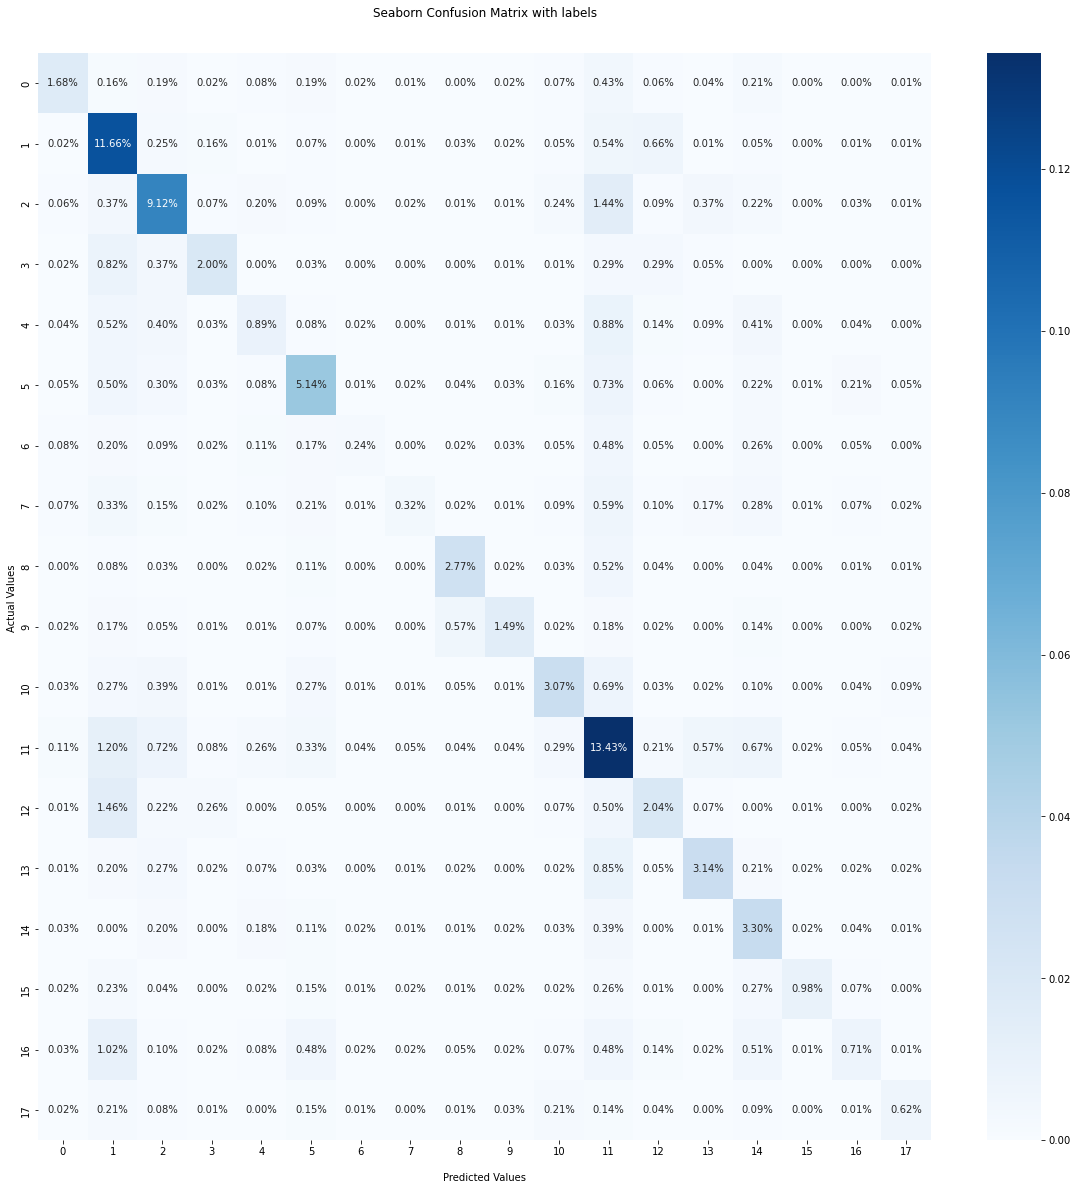

In [11]:
import seaborn as sns
plt.figure(figsize=(20,20))

ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()